In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

In [2]:
# Load dataset and parse dates
df = pd.read_csv("coin_Bitcoin.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Drop irrelevant columns
df = df.drop(columns=['SNo', 'Name', 'Symbol'])

# Set consistent plot color
blue = '#72AEE6'

In [3]:
# Summary statistics
display(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']].describe())

,Open,High,Low,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,6700.146240,6893.326038,6486.009539,6711.290443,1.090633e+10,1.208761e+11
std,11288.043736,11642.832456,10869.032130,11298.141921,1.888895e+10,2.109438e+11
min,68.504997,74.561096,65.526001,68.431000,0.000000e+00,7.784112e+08
25%,430.445496,436.179001,422.879486,430.569489,3.036725e+07,6.305579e+09
50%,2269.889893,2387.610107,2178.500000,2286.409912,9.460360e+08,3.741503e+10
75%,8569.656494,8733.926948,8289.800459,8576.238715,1.592015e+10,1.499957e+11
max,63523.754869,64863.098908,62208.964366,63503.457930,3.509679e+11,1.186364e+12


The summary statistics reveal a wide range in Bitcoin's price and market cap, with strong right skewness. The large difference between the mean and max values suggests high volatility and some extreme values.

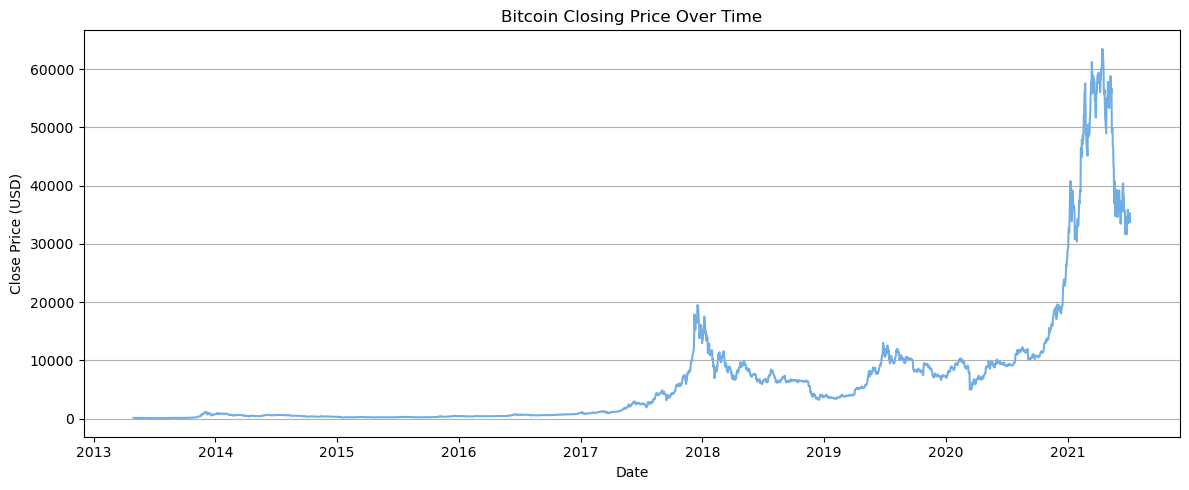

In [4]:
# Closing price over time
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], color=blue)
plt.title("Bitcoin Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Bitcoin’s closing price remained low until late 2017, then surged with major peaks in 2017 and 2021. These sharp rises indicate speculative market behavior during those periods.

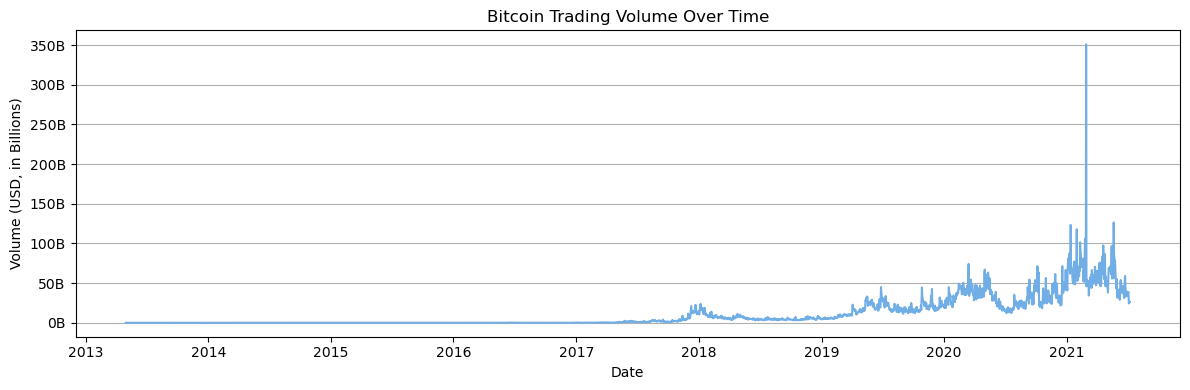

In [5]:
# Volume over time (in billions)
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Volume'], color=blue)
plt.title("Bitcoin Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume (USD, in Billions)")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-9:.0f}B'))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Trading volume followed a similar pattern, peaking especially in early 2021. This suggests that higher prices attracted more trading activity.

In [6]:
# Count zero-volume days
zero_volume_days = (df['Volume'] == 0).sum()
print(f"Days with zero volume: {zero_volume_days}")

Days with zero volume: 242


There are 242 days with zero trading volume, mostly early in the dataset. This likely reflects limited trading infrastructure or missing data during Bitcoin’s early years.

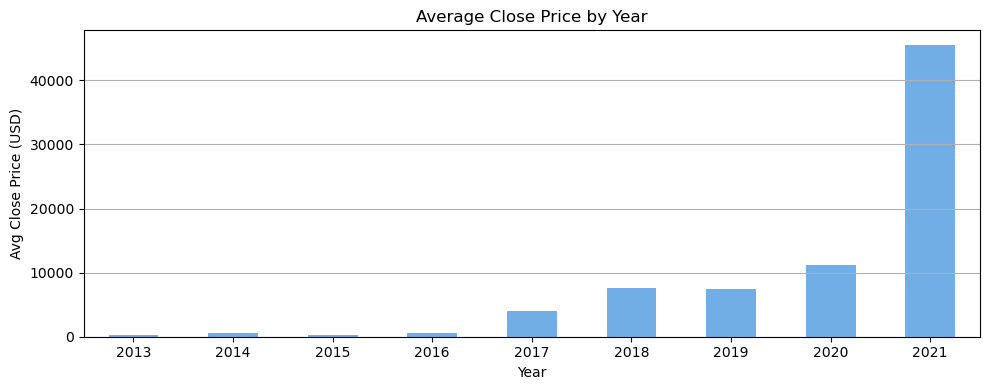

In [7]:
# Yearly average closing price
df['Year'] = df['Date'].dt.year
df.groupby('Year')['Close'].mean().plot(kind='bar', figsize=(10, 4), color=blue)
plt.title("Average Close Price by Year")
plt.ylabel("Avg Close Price (USD)")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The yearly average close price shows rapid growth from 2017 onward, with the highest mean in 2021. This reflects Bitcoin's increasing mainstream adoption and speculative interest.

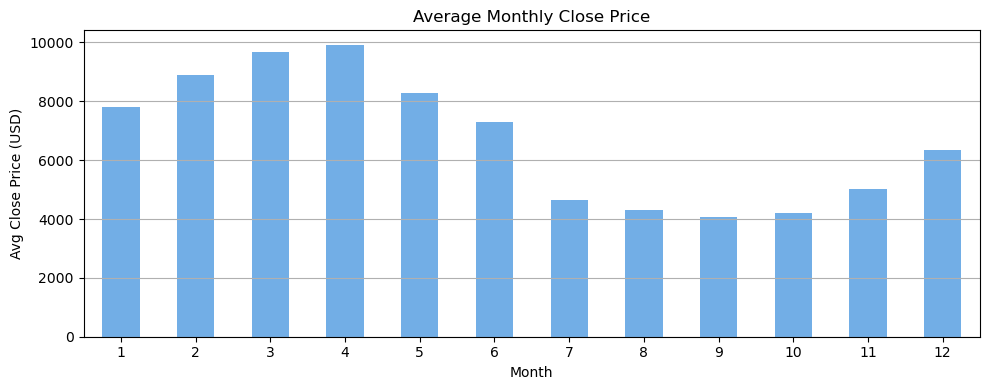

In [8]:
# Monthly average closing price
df['Month'] = df['Date'].dt.month
df.groupby('Month')['Close'].mean().plot(kind='bar', figsize=(10, 4), color=blue)
plt.title("Average Monthly Close Price")
plt.ylabel("Avg Close Price (USD)")
plt.xlabel("Month")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Monthly averages suggest possible seasonality, with higher prices observed in the first quarter (January–April). This could reflect investor cycles or external macro factors.

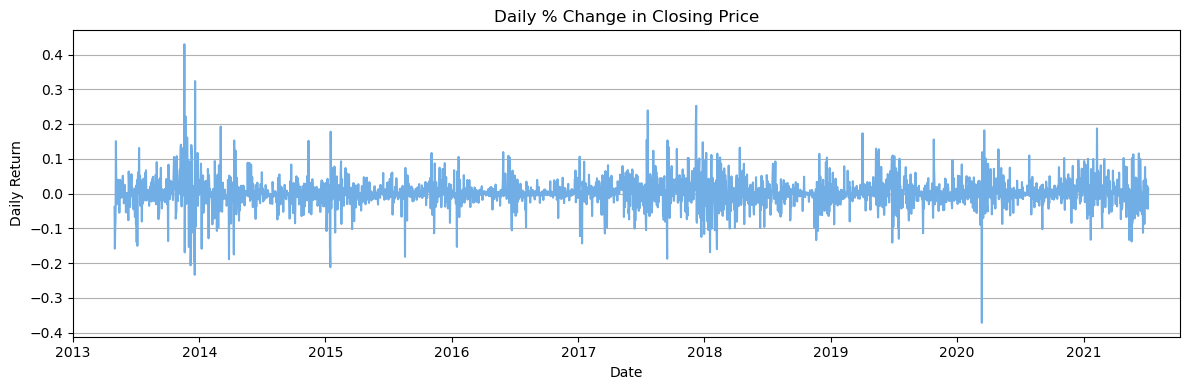

In [9]:
# Daily % change in closing price
df['Daily_Return'] = df['Close'].pct_change()

plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Daily_Return'], color=blue)
plt.title("Daily % Change in Closing Price")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.grid(axis='y')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlim(datetime(2013, 1, 1), df['Date'].max() + pd.DateOffset(months=3))
plt.tight_layout()
plt.show()

The daily return plot shows sharp spikes in both positive and negative directions, highlighting high volatility. Volatility appears to increase in recent years, especially near major market peaks.

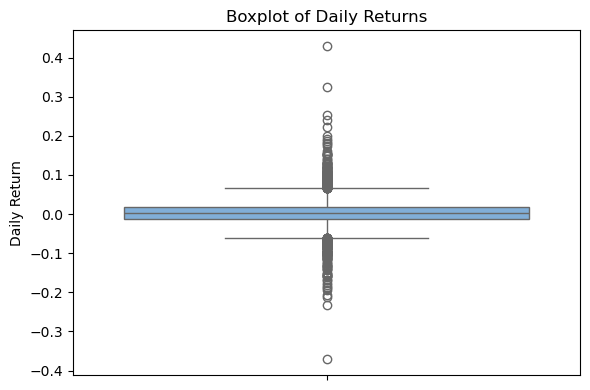

In [10]:
# Boxplot of daily returns
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Daily_Return'].dropna(), color=blue)
plt.title("Boxplot of Daily Returns")
plt.ylabel("Daily Return")
plt.tight_layout()
plt.show()

The boxplot shows that most daily returns are close to 0, but there are many outliers on both the gain and loss sides. This reinforces the presence of frequent large market moves.

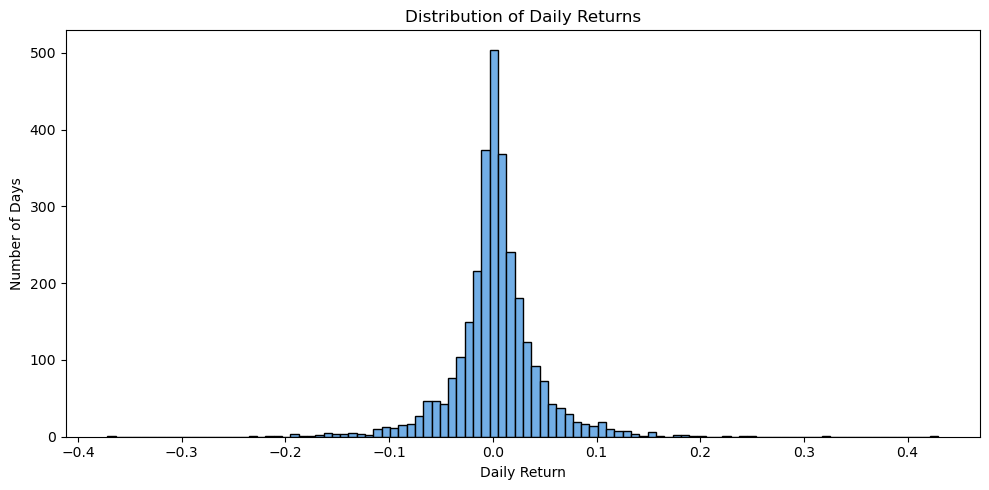

In [11]:
# Histogram of daily returns
plt.figure(figsize=(10, 5))
plt.hist(df['Daily_Return'].dropna(), bins=100, color=blue, edgecolor='black')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Number of Days")
plt.tight_layout()
plt.show()

The histogram of daily returns is centered at 0 and has a long tail on both sides, indicating a mostly normal distribution but with some extreme fluctuations. This suggests high risk and reward potential.

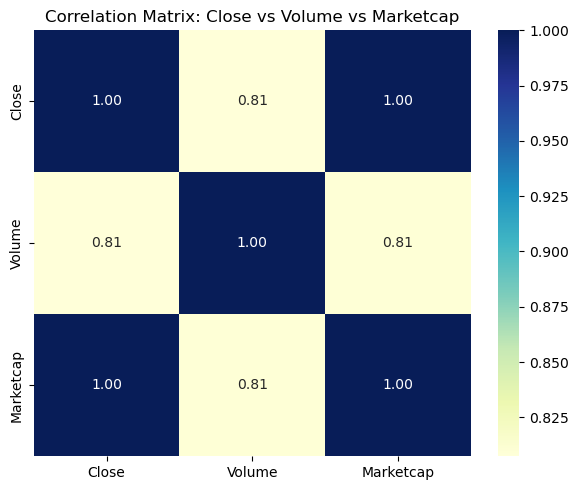

In [12]:
# Correlation matrix
correlation_data = df[['Close', 'Volume', 'Marketcap']].dropna()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_data.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix: Close vs Volume vs Marketcap")
plt.tight_layout()
plt.show()

Close price, volume, and market cap are all strongly correlated, with coefficients above 0.8. This makes sense since higher prices often lead to higher market value and more trading activity.

**EDA Summary**

- Bitcoin's price and trading volume have grown significantly over time, especially in speculative peaks like 2017 and 2021.
- Average close prices by year and month reveal long-term growth and mild seasonal patterns.
- Daily returns are centered near zero but show heavy tails, indicating occasional high volatility.
- Volatility and outliers are visible in both the boxplot and distribution of daily returns.
- Strong correlations between close price, volume, and market cap highlight market-wide trends during growth phases.